In [15]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt

## Analyse GeoTIFF

In [12]:
import rasterio

# Pfad zur GeoTIFF-Datei
tiff_path = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Rasterdateien_ProjekteBioValues/gemeindeZuerich/2207.tif'

# Öffne und analysiere das GeoTIFF
with rasterio.open(tiff_path) as src:
    print("Dateipfad:", tiff_path)
    print("Breite (Pixel):", src.width)
    print("Höhe (Pixel):", src.height)
    print("Anzahl der Bänder:", src.count)
    print("Datentyp der Bänder:", src.dtypes)
    print("Koordinatensystem (CRS):", src.crs)
    print("Affine-Transformation:", src.transform)
    
    # Zeigt Metadaten an
    print("\nMetadaten des GeoTIFF:")
    print(src.meta)

    # Zeigt die minimale und maximale Pixel-Werte jedes Bandes
    for i in range(1, src.count + 1):
        band = src.read(i)
        print(f"Band {i}: Min={band.min()}, Max={band.max()}")


Dateipfad: C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Rasterdateien_ProjekteBioValues/gemeindeZuerich/2207.tif
Breite (Pixel): 43750
Höhe (Pixel): 30000
Anzahl der Bänder: 4
Datentyp der Bänder: ('uint8', 'uint8', 'uint8', 'uint8')
Koordinatensystem (CRS): EPSG:2056
Affine-Transformation: | 0.05, 0.00, 2681250.00|
| 0.00,-0.05, 1252500.00|
| 0.00, 0.00, 1.00|

Metadaten des GeoTIFF:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 43750, 'height': 30000, 'count': 4, 'crs': CRS.from_epsg(2056), 'transform': Affine(0.05, 0.0, 2681250.0,
       0.0, -0.05, 1252500.0)}
Band 1: Min=0, Max=255
Band 2: Min=0, Max=255
Band 3: Min=0, Max=255
Band 4: Min=0, Max=255


## Analyse Liegenschaften Shapefiles

In [16]:
import geopandas as gpd

# Pfad zur Shapefile-Datei
shapefile_path = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp'

# Öffne und analysiere das Shapefile
gdf = gpd.read_file(shapefile_path)

# Zeigt die Spaltennamen (Attribute) im Shapefile
print("Spaltennamen im Shapefile:")
print(gdf.columns)

# Zeigt die ersten 5 Zeilen des Shapefiles, um den Inhalt der Spalten zu sehen
print("\nErste 5 Zeilen des Shapefiles:")
print(gdf.head())

# Gibt die eindeutigen Werte für jede Spalte aus, um mögliche IDs zu identifizieren
for column in gdf.columns:
    unique_values = gdf[column].unique()
    print(f"\nEinzigartige Werte in der Spalte '{column}':")
    print(unique_values[:10])  # Zeigt die ersten 10 einzigartigen Werte, um die Liste kurz zu halten


Spaltennamen im Shapefile:
Index(['OBJID', 'NBIDENT', 'NUMMER', 'EGRIS_EGRI', 'VOLLSTAEND', 'FLAECHENMA',
       'BFSNR', 'BEARBEITUN', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

Erste 5 Zeilen des Shapefiles:
      OBJID       NBIDENT NUMMER      EGRIS_EGRI    VOLLSTAEND  FLAECHENMA  \
0  1163_921  ZH0200000091   1057  CH307754773178  Vollstaendig        2253   
1  1163_937  ZH0200000091   1191  CH727773315415  Vollstaendig         236   
2  1163_898  ZH0200000091   1077  CH757231775450  Vollstaendig       78267   
3  1163_894  ZH0200000091   1078  CH767731547675  Vollstaendig        1508   
4  1163_920  ZH0200000091   1056  CH733177547283  Vollstaendig        1549   

   BFSNR  BEARBEITUN    SHAPE_AREA    SHAPE_LEN  \
0     91  12.12.2000   2252.630153  1092.209136   
1     91  12.12.2000    235.645399   150.959750   
2     91  12.12.2000  78266.155172  1177.412784   
3     91  12.12.2000   1508.207545   739.642187   
4     91  12.12.2000   1549.489272   157.90333

## Test Zuschnitt einer einzelnen Parzelle

Gefundene Parzelle:              OBJID       NBIDENT  NUMMER      EGRIS_EGRI    VOLLSTAEND  \
109211  1105_18060  ZH0200000261  AF2399  CH439978914205  Vollstaendig   

        FLAECHENMA  BFSNR  BEARBEITUN    SHAPE_AREA   SHAPE_LEN  \
109211       18577    261  25.10.1948  18577.242579  592.133636   

                                                 geometry  
109211  POLYGON ((2681808.527 1251860.664, 2681839.793...  


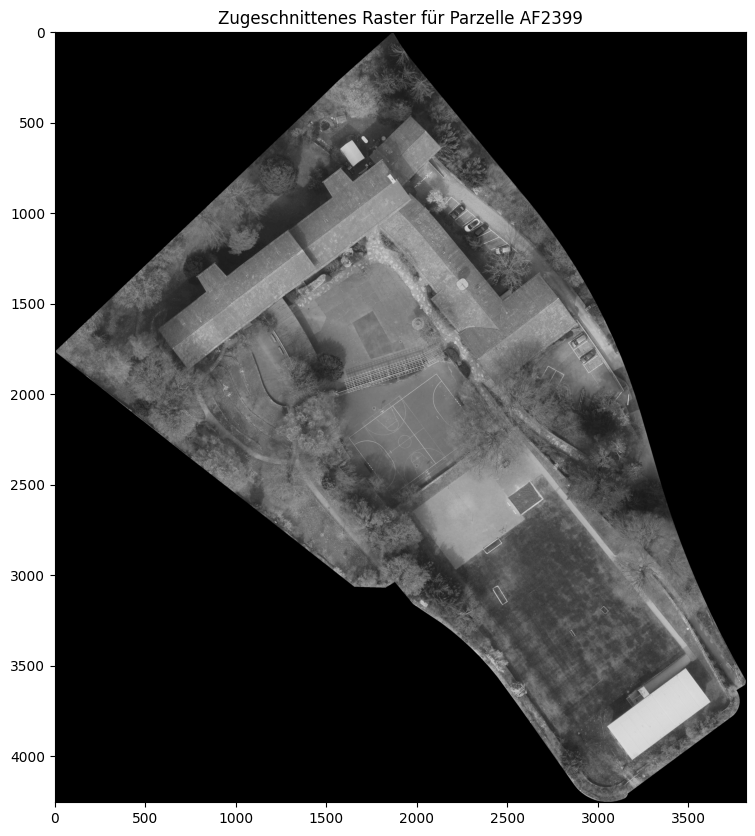

Zugeschnittenes Rasterbild für Parzelle AF2399 gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle1_AF2399_cropped.tif


In [18]:


# Pfad zu den Shapefiles und zur TIFF-Datei
shapefile_path = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp'  # Liegenschaften-Shapefile
tiff_path = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Rasterdateien_ProjekteBioValues/gemeindeZuerich/2207.tif'  # TIFF-Datei (Orthofoto)

# 1. Shapefile laden
gdf = gpd.read_file(shapefile_path)

# 2. Filtere die Parzelle AF2399 aus dem Shapefile
parzellen_nr = 'AF2399'
relevante_parzelle = gdf[gdf['NUMMER'] == parzellen_nr]

# Überprüfen, ob die Parzelle gefunden wurde
if relevante_parzelle.empty:
    print(f"Parzelle {parzellen_nr} nicht gefunden.")
else:
    print(f"Gefundene Parzelle: {relevante_parzelle}")

    # 3. Orthofoto (TIFF) laden und zuschneiden
    with rasterio.open(tiff_path) as src:
        # Konvertiere die Geometrie der Parzelle in das für rasterio benötigte Format
        geoms = relevante_parzelle.geometry.values  # Geometrien extrahieren
        geoms = [g.__geo_interface__ for g in geoms]  # In GeoJSON-ähnliches Format umwandeln
        
        # Zuschneiden des TIFF-Bildes basierend auf der Parzellengeometrie
        out_image, out_transform = mask(src, geoms, crop=True)
        
        # Metadaten des zugeschnittenen Bildes aktualisieren
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })

        # 4. Entferne den unnötigen Rand aus dem Bild
        # Berechne Bounding Box um die non-zero Pixel
        non_zero_coords = np.column_stack(np.where(out_image[0] != 0))
        min_row, min_col = non_zero_coords.min(axis=0)
        max_row, max_col = non_zero_coords.max(axis=0)

        # Zuschnitt des Bildes auf die tatsächlichen Daten
        cropped_image = out_image[:, min_row:max_row+1, min_col:max_col+1]

        # Aktualisiere die Metadaten nach dem Zuschneiden
        cropped_transform = src.window_transform(rasterio.windows.Window.from_slices(
            (min_row, max_row+1), (min_col, max_col+1)
        ))
        out_meta.update({
            "height": cropped_image.shape[1],
            "width": cropped_image.shape[2],
            "transform": cropped_transform
        })

        # 5. Gespeichertes zugeschnittenes Bild anzeigen
        plt.figure(figsize=(10, 10))
        plt.imshow(cropped_image[0], cmap='gray')
        plt.title(f"Zugeschnittenes Raster für Parzelle {parzellen_nr}")
        plt.show()

        # 6. Optional: Speichere das zugeschnittene Rasterbild als neue TIFF-Datei
        output_tiff = f'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle1_{parzellen_nr}_cropped.tif'
        with rasterio.open(output_tiff, "w", **out_meta) as dest:
            dest.write(cropped_image)
        print(f"Zugeschnittenes Rasterbild für Parzelle {parzellen_nr} gespeichert als {output_tiff}")


Das GeoTIFF-Bild wird basierend auf den Koordinaten der Geometrie der Parzelle zugeschnitten. Hier sind die wichtigsten Schritte, wie das Programm entscheidet, welchen Bereich des GeoTIFFs es verwenden muss:

Geometrie der Parzelle:

Nachdem das Shapefile geladen wurde, enthält die Zeile relevante_parzelle = gdf[gdf['NUMMER'] == parzellen_nr] die geometrische Form der gesuchten Parzelle in der Spalte geometry.
Diese Geometrie ist in der Regel ein Polygon oder ein anderer geometrischer Typ, der die exakten Koordinaten (X, Y) der Parzellengrenzen im Koordinatensystem der Daten definiert.
Koordinatensystemabgleich:

Sowohl das GeoTIFF als auch das Shapefile haben ein Koordinatensystem (meist UTM oder WGS84). Diese müssen übereinstimmen, damit der Ausschnitt korrekt funktioniert.
Falls die Koordinatensysteme unterschiedlich sind, müsste man die Geometrie oder das Bild vorher transformieren. In diesem Code wird davon ausgegangen, dass beide das gleiche Koordinatensystem haben.
Maskierung mit rasterio.mask.mask():

Die Funktion mask in rasterio verwendet die Geometrie (Parzellenumriss) und schneidet das GeoTIFF auf die exakte Form dieser Geometrie zu.
Intern ermittelt mask, welche Pixel des TIFF-Bildes innerhalb oder außerhalb der Parzellengrenzen liegen, indem es die Pixelkoordinaten mit den Parzellengrenzen vergleicht.
Pixel, die innerhalb der Grenzen liegen, werden beibehalten, während Pixel außerhalb der Grenzen ausgeblendet oder maskiert werden.
Affine-Transformation:

Das GeoTIFF hat eine sogenannte Affine-Transformation (src.transform), die das Pixelraster des Bildes in das geografische Koordinatensystem umrechnet.
Mithilfe dieser Transformation kann rasterio die geometrische Form (also die Parzellenkoordinaten) auf das Raster anwenden und genau die Pixel ermitteln, die der Parzellenform entsprechen.
Bounding Box der Parzelle:

rasterio berechnet aus der Geometrie der Parzelle eine "Bounding Box", also ein Rechteck, das die Parzelle vollständig umschließt.
Dieses Rechteck dient als erster grober Filter, um die relevanten Pixel einzugrenzen, bevor genau ermittelt wird, welche innerhalb des Parzellenumrisses liegen.
Durch diese Schritte weiß der Code genau, welche Pixel des GeoTIFF-Bildes er für den zugeschnittenen Ausschnitt beibehalten muss und welche er entfernen kann.

## Separter Code für Liegenschaften WE13005-13 (Anlage Manuela)

In [7]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.merge import merge
import os

# Pfad zu den Shapefiles und zur Rasterdatei
ziel_shapefile_path = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp'
raster_path = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Rasterdateien_ProjekteBioValues/3612.tif'


# Ziel-Liegenschaften
ziel_liegenschaften = [f"WE130{i}" for i in range(5, 13)]  # Generiert WE13005 bis WE13012

# Geometrien der Ziel-Liegenschaften sammeln
ziel_geometrien = []

# Shapefile laden und nur die relevanten Einträge filtern
gdf = gpd.read_file(ziel_shapefile_path)
relevante_liegenschaften = gdf[gdf['NUMMER'].isin(['WE13005', 'WE13006', 'WE13007', 'WE13008', 'WE13009', 'WE13010', 'WE13011', 'WE13012', 'WE13013'])]
ziel_geometrien = relevante_liegenschaften.geometry.values

if ziel_geometrien.size == 0:
    print("Keine Ziel-Liegenschaften in der Datei gefunden.")
else:
    print(f"Gefundene Geometrien: {len(ziel_geometrien)}")


# Prüfen, ob Geometrien gefunden wurden
if not ziel_geometrien:
    print("Keine der Ziel-Liegenschaften wurde in den Shapefiles gefunden.")
else:
    # Geometrien ins GeoJSON-ähnliche Format konvertieren
    ziel_geometrien = [geom.__geo_interface__ for geom in ziel_geometrien]

    # Rasterdatei laden und Mask anwenden
    with rasterio.open(raster_path) as src:
        try:
            # Zuschneiden der TIFF-Datei basierend auf den kombinierten Geometrien
            out_image, out_transform = mask(src, ziel_geometrien, crop=True)
            
            # Metadaten aktualisieren
            out_meta = src.meta.copy()
            out_meta.update({
                "driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform
            })
            
            # Ergebnis speichern
            output_tiff = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/WE13005_WE13012_merged.tif'
            with rasterio.open(output_tiff, "w", **out_meta) as dest:
                dest.write(out_image)
            
            print(f"Die Liegenschaften WE13005-WE13012 wurden erfolgreich ausgeschnitten und gespeichert als {output_tiff}")
        except ValueError as e:
            print(f"Fehler beim Zuschneiden: {e}")


Gefundene Geometrien: 9
Die Liegenschaften WE13005-WE13012 wurden erfolgreich ausgeschnitten und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/WE13005_WE13012_merged.tif


## Zuschneiden Parzellen der Gemeinde Zürich

In [33]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import os

# Pfade zu den Shapefiles und zu den TIFF-Dateien
# Pfad zu den Shapefiles und zur TIFF-Datei
shapefile_paths = [
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_POS_P.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_POS_P.shp'
]
tiff_directory = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Rasterdateien_ProjekteBioValues/gemeindeZuerich/'  # Verzeichnis mit TIFF-Dateien

# Liste der Parzellen, die gesucht werden sollen
parzellen_liste = [
    'SE6813', 'SE6637', 'HG7626', 'OB2939', 'WE13012', 'RI5416', 'RI5481',
    'OB3455', 'AL02974', 'AL7430', 'AF2399', 'WE10905', 'WO1900', 'WI3878',
    'IQ6786', 'IQ7084', 'HG7909', 'WO4730']

# 2. Alle TIFF-Dateien im Verzeichnis durchlaufen
tiff_files = [f for f in os.listdir(tiff_directory) if f.endswith('.tif')]

# Ergebnis speichern (Parzellen und die entsprechenden TIFF-Dateien)
parzellen_ergebnisse = {}

# 3. Jede Parzelle suchen
for parzellen_nr in parzellen_liste:
    parzelle_gefunden = False  # Um zu prüfen, ob die Parzelle in einem der Shapefiles gefunden wurde
    
    # Shapefiles der Reihe nach durchsuchen
    for shapefile_path in shapefile_paths:
        # Shapefile laden
        gdf = gpd.read_file(shapefile_path)
        
        # Filtere die Parzelle aus dem aktuellen Shapefile
        relevante_parzelle = gdf[gdf['NUMMER'] == parzellen_nr]
        
        if relevante_parzelle.empty:
            # Wenn die Parzelle in diesem Shapefile nicht gefunden wird, gehe zum nächsten Shapefile
            continue
        else:
            # Wenn die Parzelle gefunden wurde, durchsuche die TIFF-Dateien
            for tiff_file in tiff_files:
                tiff_path = os.path.join(tiff_directory, tiff_file)
                
                # Versuche, die Parzelle in der aktuellen TIFF-Datei zu finden
                with rasterio.open(tiff_path) as src:
                    geoms = relevante_parzelle.geometry.values  # Geometrien extrahieren
                    geoms = [g.__geo_interface__ for g in geoms]  # In GeoJSON-ähnliches Format umwandeln
                    
                    try:
                        # Zuschneiden des TIFF-Bildes basierend auf der Parzellengeometrie
                        out_image, out_transform = mask(src, geoms, crop=True)
                        
                        # Wenn erfolgreich, speichere die Parzelle und gib die TIFF-Datei aus
                        output_tiff = f'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_{parzellen_nr}_{tiff_file}'
                        
                        out_meta = src.meta.copy()
                        out_meta.update({
                            "driver": "GTiff",
                            "height": out_image.shape[1],
                            "width": out_image.shape[2],
                            "transform": out_transform
                        })
                        
                        with rasterio.open(output_tiff, "w", **out_meta) as dest:
                            dest.write(out_image)
                        
                        print(f"Parzelle {parzellen_nr} gefunden in {tiff_file} und gespeichert als {output_tiff}")
                        parzellen_ergebnisse[parzellen_nr] = tiff_file
                        parzelle_gefunden = True
                        break  # Wenn die Parzelle gefunden wurde, gehe zur nächsten Parzelle
                    
                    except ValueError:
                        # Falls die Parzelle nicht in dieser TIFF-Datei ist, weiter zur nächsten TIFF-Datei
                        continue
            
            if parzelle_gefunden:
                break  # Falls die Parzelle in diesem Shapefile gefunden wurde, breche die Suche ab
    
    if not parzelle_gefunden:
        print(f"Parzelle {parzellen_nr} wurde in keinem Shapefile und keiner TIFF-Datei gefunden.")
        parzellen_ergebnisse[parzellen_nr] = "Nicht gefunden"

# Ausgabe der Ergebnisse
for parzelle, tiff in parzellen_ergebnisse.items():
    print(f"Parzelle {parzelle} gefunden in {tiff}")


Parzelle SE6813 gefunden in 2108.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_SE6813_2108.tif
Parzelle SE6637 gefunden in 2107.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_SE6637_2107.tif
Parzelle HG7626 gefunden in 2306.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_HG7626_2306.tif
Parzelle OB2939 gefunden in 2408.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_OB2939_2408.tif
Parzelle WE13012 wurde in keinem Shapefile und keiner TIFF-Datei gefunden.
Parzelle RI5416 gefunden in 2608.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_RI5416_2608.tif
Parzelle RI5481 gefunden in 2609.tif und gespeichert als C:/Users/Mari

In [10]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import os

# Pfade zu den Shapefiles und zu den TIFF-Dateien
# Pfad zu den Shapefiles und zur TIFF-Datei
shapefile_paths = [
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_POS_P.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_POS_P.shp'
]
tiff_directory = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Rasterdateien_ProjekteBioValues/gemeindeZuerich/'  # Verzeichnis mit TIFF-Dateien

# Liste der Parzellen, die gesucht werden sollen
parzellen_liste = [
    'AR6738',
    'BG125',
    'HO3257',
    'IQ6786',
    'IQ6786',
    'IQ6786',
    'IQ7084',
    'MA1819',
    'OB2939',
    'RI5416',
    'RI5481',
    'SE6637',
    'WD8499',
    'WD9066'
]


# 2. Alle TIFF-Dateien im Verzeichnis durchlaufen
tiff_files = [f for f in os.listdir(tiff_directory) if f.endswith('.tif')]

# Ergebnis speichern (Parzellen und die entsprechenden TIFF-Dateien)
parzellen_ergebnisse = {}

# 3. Jede Parzelle suchen
for parzellen_nr in parzellen_liste:
    parzelle_gefunden = False  # Um zu prüfen, ob die Parzelle in einem der Shapefiles gefunden wurde
    
    # Shapefiles der Reihe nach durchsuchen
    for shapefile_path in shapefile_paths:
        # Shapefile laden
        gdf = gpd.read_file(shapefile_path)
        
        # Filtere die Parzelle aus dem aktuellen Shapefile
        relevante_parzelle = gdf[gdf['NUMMER'] == parzellen_nr]
        
        if relevante_parzelle.empty:
            # Wenn die Parzelle in diesem Shapefile nicht gefunden wird, gehe zum nächsten Shapefile
            continue
        else:
            # Wenn die Parzelle gefunden wurde, durchsuche die TIFF-Dateien
            for tiff_file in tiff_files:
                tiff_path = os.path.join(tiff_directory, tiff_file)
                
                # Versuche, die Parzelle in der aktuellen TIFF-Datei zu finden
                with rasterio.open(tiff_path) as src:
                    geoms = relevante_parzelle.geometry.values  # Geometrien extrahieren
                    geoms = [g.__geo_interface__ for g in geoms]  # In GeoJSON-ähnliches Format umwandeln
                    
                    try:
                        # Zuschneiden des TIFF-Bildes basierend auf der Parzellengeometrie
                        out_image, out_transform = mask(src, geoms, crop=True)
                        
                        # Wenn erfolgreich, speichere die Parzelle und gib die TIFF-Datei aus
                        output_tiff = f'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_{parzellen_nr}_{tiff_file}'
                        
                        out_meta = src.meta.copy()
                        out_meta.update({
                            "driver": "GTiff",
                            "height": out_image.shape[1],
                            "width": out_image.shape[2],
                            "transform": out_transform
                        })
                        
                        with rasterio.open(output_tiff, "w", **out_meta) as dest:
                            dest.write(out_image)
                        
                        print(f"Parzelle {parzellen_nr} gefunden in {tiff_file} und gespeichert als {output_tiff}")
                        parzellen_ergebnisse[parzellen_nr] = tiff_file
                        parzelle_gefunden = True
                        break  # Wenn die Parzelle gefunden wurde, gehe zur nächsten Parzelle
                    
                    except ValueError:
                        # Falls die Parzelle nicht in dieser TIFF-Datei ist, weiter zur nächsten TIFF-Datei
                        continue
            
            if parzelle_gefunden:
                break  # Falls die Parzelle in diesem Shapefile gefunden wurde, breche die Suche ab
    
    if not parzelle_gefunden:
        print(f"Parzelle {parzellen_nr} wurde in keinem Shapefile und keiner TIFF-Datei gefunden.")
        parzellen_ergebnisse[parzellen_nr] = "Nicht gefunden"

# Ausgabe der Ergebnisse
for parzelle, tiff in parzellen_ergebnisse.items():
    print(f"Parzelle {parzelle} gefunden in {tiff}")


Parzelle AR6738 gefunden in 2506.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_AR6738_2506.tif
Parzelle BG125 wurde in keinem Shapefile und keiner TIFF-Datei gefunden.
Parzelle HO3257 gefunden in 2508.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_HO3257_2508.tif
Parzelle IQ6786 gefunden in 2407.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_IQ6786_2407.tif
Parzelle IQ6786 gefunden in 2407.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_IQ6786_2407.tif
Parzelle IQ6786 gefunden in 2407.tif und gespeichert als C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_IQ6786_2407.tif
Parzelle IQ7084 gefunden in 2407.tif und gespeichert als C:/Users/Maria/

In [4]:
import geopandas as gpd

# Liste der Pfade zu den Shapefiles
shapefile_paths = [
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_POS_P.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_POS_P.shp'
]

# Parzellennummer, die du suchen möchtest
gesuchte_parzelle = '5789'

# Durchsucht jedes Shapefile
for shapefile_path in shapefile_paths:
    print(f"\nDurchsuche Shapefile: {shapefile_path}")
    
    try:
        # Shapefile laden
        gdf = gpd.read_file(shapefile_path)
        
        # Spaltennamen und Anzahl Zeilen anzeigen
        print("Spaltennamen:", gdf.columns.tolist())
        print("Anzahl Zeilen:", len(gdf))
        
        # Nach der Parzellennummer suchen, falls die Spalte 'NUMMER' existiert
        if 'NUMMER' in gdf.columns:
            relevante_parzellen = gdf[gdf['NUMMER'].astype(str).str.contains(gesuchte_parzelle)]
            
            # Ergebnisse der Suche anzeigen
            if not relevante_parzellen.empty:
                print(f"\nGefundene Einträge, die '{gesuchte_parzelle}' in der Spalte 'NUMMER' enthalten:")
                print(relevante_parzellen)
            else:
                print(f"Keine Einträge mit der Parzellennummer '{gesuchte_parzelle}' gefunden.")
        else:
            print("Spalte 'NUMMER' ist im Shapefile nicht vorhanden.")

    except Exception as e:
        print(f"Fehler beim Öffnen oder Verarbeiten des Shapefiles: {e}")



Durchsuche Shapefile: C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp
Spaltennamen: ['OBJID', 'NBIDENT', 'NUMMER', 'EGRIS_EGRI', 'VOLLSTAEND', 'FLAECHENMA', 'BFSNR', 'BEARBEITUN', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry']
Anzahl Zeilen: 392593

Gefundene Einträge, die '5789' in der Spalte 'NUMMER' enthalten:
                         OBJID       NBIDENT  NUMMER      EGRIS_EGRI  \
13774                1144_1240  ZH0200000067    5789  CH974577871250   
23847                1056_2598  ZH0200000191    5789  CH707703079463   
25732                 1066_683  ZH0200000200    5789  CH632577147409   
66856                1043_1337  ZH0200000161    5789  CH507722852388   
71722                1128_2830  ZH0200000052    5789  CH939177860911   
72275                 1056_264  ZH0200000191   15789  CH870377709423   
76541              1177_265466  ZH0200000293  WE5

## Zuschnitt GeoTIFFS validierungsobjekte

Zuerst habe ich mich auf die Gemeinde Zürich beschränkt, um die Codes zu testen. Da die Tiff-Dateien relativ groß sind und man die Kartenausschnitte nicht auf einmal herunterladen kann. 

Die validierten Projekte waren aber größtenteils ausserhalb von der Gemeinde Zürich. Dafür habe ich das jeweilige GeoTiff heruntergeladen. Da die Parzellennummern ausserhalb der Gemeinde Zürich nur aus Zahlen bestehen und für jede Gemeinde des Kantons Parzellennummern zu den Gebäuden exisitieren, konnte ich die "NUMMER" aus dem vorherigen Code für die Gemeinde Zürich nicht mehr übergreifend auf den Kanton anwenden. Deswegen stattdessen die EGRIS_EGRI IDs pro Parzelle herausgesucht und diese als ID verwendet.

In [11]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import os

# Pfade zu den Shapefiles und zu den TIFF-Dateien
shapefile_paths = [
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_F.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_PROJ_POS_P.shp',
    'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/ShapefilesLiegenschaften_KantonZuerich/AV_MOpublic-_Liegenschaften_-OGD/AVZH_LIEGENSCHAFTEN_POS_P.shp'
]
tiff_directory = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Rasterdateien_ProjekteBioValues/'  # Verzeichnis mit TIFF-Dateien

# Liste der EGRIS_EGRI IDs, die gesucht werden sollen
egris_id_liste = [
    'CH989587617794',
    'CH818970287742',
    'CH407786929139',
    'CH379677787604',
    'CH127776678553',
    'CH250808770570',
    'CH849650779711',
    'CH207708067615',
    'CH127791864892',
    'CH827776993164',
    'CH907710844145'
]

# Alle TIFF-Dateien im Verzeichnis durchlaufen
tiff_files = [f for f in os.listdir(tiff_directory) if f.endswith('.tif')]

# Ergebnis speichern (EGRIS IDs und die entsprechenden TIFF-Dateien)
egris_ergebnisse = {}

# Jede EGRIS ID suchen
for egris_id in egris_id_liste:
    egris_gefunden = False  # Um zu prüfen, ob die EGRIS ID in einem der Shapefiles gefunden wurde
    
    # Shapefiles der Reihe nach durchsuchen
    for shapefile_path in shapefile_paths:
        # Shapefile laden
        gdf = gpd.read_file(shapefile_path)
        
        # Filtere die EGRIS ID aus dem aktuellen Shapefile anhand der Spalte 'EGRIS_EGRI'
        relevante_parzelle = gdf[gdf['EGRIS_EGRI'] == egris_id]
        
        if relevante_parzelle.empty:
            # Wenn die EGRIS ID in diesem Shapefile nicht gefunden wird, gehe zum nächsten Shapefile
            continue
        else:
            # Wenn die EGRIS ID gefunden wurde, durchsuche die TIFF-Dateien
            for tiff_file in tiff_files:
                tiff_path = os.path.join(tiff_directory, tiff_file)
                
                # Versuche, die EGRIS ID in der aktuellen TIFF-Datei zu finden
                with rasterio.open(tiff_path) as src:
                    geoms = relevante_parzelle.geometry.values  # Geometrien extrahieren
                    geoms = [g.__geo_interface__ for g in geoms]  # In GeoJSON-ähnliches Format umwandeln
                    
                    try:
                        # Zuschneiden des TIFF-Bildes basierend auf der Geometrie
                        out_image, out_transform = mask(src, geoms, crop=True)
                        
                        # Wenn erfolgreich, speichere die zugeschnittene TIFF-Datei
                        output_tiff = f'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/Parzelle_{egris_id}_{tiff_file}'
                        
                        out_meta = src.meta.copy()
                        out_meta.update({
                            "driver": "GTiff",
                            "height": out_image.shape[1],
                            "width": out_image.shape[2],
                            "transform": out_transform
                        })
                        
                        with rasterio.open(output_tiff, "w", **out_meta) as dest:
                            dest.write(out_image)
                        
                        print(f"EGRIS ID {egris_id} gefunden in {tiff_file} und gespeichert als {output_tiff}")
                        egris_ergebnisse[egris_id] = tiff_file
                        egris_gefunden = True
                        break  # Wenn die EGRIS ID gefunden wurde, gehe zur nächsten EGRIS ID
                    
                    except ValueError:
                        # Falls die EGRIS ID nicht in dieser TIFF-Datei ist, weiter zur nächsten TIFF-Datei
                        continue
            
            if egris_gefunden:
                break  # Falls die EGRIS ID in diesem Shapefile gefunden wurde, breche die Suche ab
    
    if not egris_gefunden:
        print(f"EGRIS ID {egris_id} wurde in keinem Shapefile und keiner TIFF-Datei gefunden.")
        egris_ergebnisse[egris_id] = "Nicht gefunden"

# Ausgabe der Ergebnisse
for egris, tiff in egris_ergebnisse.items():
    print(f"EGRIS ID {egris} gefunden in {tiff}")


KeyboardInterrupt: 

In [9]:
import os

# Verzeichnis mit den bereits generierten Dateien
output_directory = 'C:/Users/Maria/OneDrive - Hochschule Luzern/Dokumente/HS Luzern/Masterarbeit_Maria/Daten/'

# Mapping der Parzellennummern und EGRIS_EGRI IDs
parzellen_mapping = {
    '5789': 'CH989587617794',
    '1324': 'CH818970287742',
    '1575': 'CH407786929139',
    'BA7000': 'CH379677787604',
    '2081': 'CH127776678553',
    '5950': 'CH250808770570',
    '4164': 'CH849650779711',
    '7885': 'CH207708067615',
    '473': 'CH127791864892',
    '1375': 'CH827776993164',
    '3048': 'CH907710844145'
}

# Dateien im Verzeichnis durchsuchen und umbenennen
for file_name in os.listdir(output_directory):
    if file_name.startswith("Parzelle_") and file_name.endswith(".tif"):
        # Extrahiere die aktuelle EGRIS_ID und finde die zugehörige Parzellennummer
        egris_id = file_name.split('_')[1]
        
        # Suche die passende Parzellennummer für die EGRIS_ID
        parzelle_nr = next((k for k, v in parzellen_mapping.items() if v == egris_id), None)
        
        # Überspringe Dateien ohne zugehörige Parzellennummer oder EGRIS_ID
        if not parzelle_nr or not egris_id:
            continue

        # Neues Dateinamenformat: Parzelle_ParzellenNr_EGRIS_ID_OriginalName.tif
        new_file_name = f"Parzelle_{parzelle_nr}_{egris_id}_{file_name.split('_')[2]}"
        
        # Altes und neues Dateipfad erstellen
        old_path = os.path.join(output_directory, file_name)
        new_path = os.path.join(output_directory, new_file_name)
        
        # Datei umbenennen
        os.rename(old_path, new_path)
        print(f"{file_name} umbenannt zu {new_file_name}")


Parzelle_CH127776678553_1704.tif umbenannt zu Parzelle_2081_CH127776678553_1704.tif
Parzelle_CH127791864892_3220.tif umbenannt zu Parzelle_473_CH127791864892_3220.tif
Parzelle_CH207708067615_3514.tif umbenannt zu Parzelle_7885_CH207708067615_3514.tif
Parzelle_CH250808770570_1909.tif umbenannt zu Parzelle_5950_CH250808770570_1909.tif
Parzelle_CH379677787604_2519.tif umbenannt zu Parzelle_BA7000_CH379677787604_2519.tif
Parzelle_CH407786929139_2010.tif umbenannt zu Parzelle_1575_CH407786929139_2010.tif
Parzelle_CH818970287742_3204.tif umbenannt zu Parzelle_1324_CH818970287742_3204.tif
Parzelle_CH827776993164_1007.tif umbenannt zu Parzelle_1375_CH827776993164_1007.tif
Parzelle_CH849650779711_3313.tif umbenannt zu Parzelle_4164_CH849650779711_3313.tif
Parzelle_CH907710844145_3014.tif umbenannt zu Parzelle_3048_CH907710844145_3014.tif
Parzelle_CH989587617794_2005.tif umbenannt zu Parzelle_5789_CH989587617794_2005.tif
